# ⚙️ Polynomial Regression using Pipeline

Instead of manually transforming the data with `PolynomialFeatures` and 
then fitting a `LinearRegression` model, we can simplify the process 
using a **Pipeline**.

A Pipeline allows us to **chain multiple steps** (like preprocessing and modeling) 
into a single object — making the code cleaner, more readable, and less error-prone.


In [3]:
# 📦 Import required libraries
# 📦 Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [4]:
# 🧩 Generating Non-linear Data
np.random.seed(42)

X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 2 + 1.5*X - 0.3*X**2 + np.random.randn(100, 1) * 2

In [5]:
# 🧱 Creating the Pipeline
model = Pipeline([
    ("poly_features", PolynomialFeatures(degree=2)),   # Step 1: Generate polynomial terms
    ("linear_regression", LinearRegression())           # Step 2: Fit Linear Regression
])

# Training the pipeline model
model.fit(X, y)

# Predicting using the pipeline
y_pred_pipeline = model.predict(X)

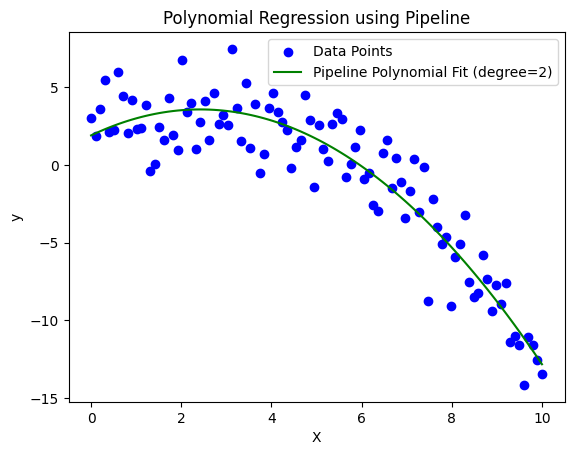

In [6]:
# 📊 Visualizing the Polynomial Regression via Pipeline
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, y_pred_pipeline, color='green', label='Pipeline Polynomial Fit (degree=2)')
plt.title("Polynomial Regression using Pipeline")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

## 🧠 Intuition behind Pipeline

The `Pipeline` automatically applies all steps **in order** when you call `.fit()` or `.predict()`.

For example:

1. When you call `model.fit(X, y)`:
   - Step 1: Transforms `X` → `[1, X, X²]` using `PolynomialFeatures`
   - Step 2: Fits `LinearRegression` on this transformed data.

2. When you call `model.predict(X)`:
   - Step 1: Transforms `X` the same way as training.
   - Step 2: Uses the trained regression model to predict `y`.

✅ This ensures consistency between training and prediction.

---

## ⚙️ Why Use a Pipeline?

| Advantage | Explanation |
|------------|-------------|
| Cleaner Code | No need to manually handle transformations |
| Prevents Data Leakage | Ensures preprocessing happens inside model |
| Easy Experimentation | Just change the degree in one place |
| Integrates with GridSearchCV | Makes hyperparameter tuning simple |

---

## 🔍 Example: Changing the Degree Easily

```python
for degree in [2, 3, 4]:
    model = Pipeline([
        ("poly_features", PolynomialFeatures(degree=degree)),
        ("linear_regression", LinearRegression())
    ])
    model.fit(X, y)
    y_pred = model.predict(X)
    plt.plot(X, y_pred, label=f"Degree={degree}")

plt.scatter(X, y, color='blue', label='Data Points')
plt.title("Polynomial Regression for Different Degrees")
plt.legend()
plt.show()
